# NLP IV: Information Extraction in NLP

In this notebook, we will delve into the topics of labeling, label recognition, and information extraction within the domain of natural language processing. By understanding these concepts, we'll be better equipped to handle and utilize the information efficiently.

## Data labeling and recognition
We've already covered the process of labeling data in our previous notebook. Now, let's begin by importing the necessary libraries:

In [1]:
import nltk
from nltk.tag.hmm import HiddenMarkovModelTagger

from nltk.chunk.regexp import *

# Do't forget to import your library.
# Type your code here:
from Libraries import tokenization

In [2]:
corpus = [
    'Eustaquio tiene un coche amarillo',
    'Hermenegildo tiene un mechero',
    'Sole tiene un huevo de avestruz',
    'María quiere una tele curva',
    'El niño come una tortilla de patatas',
    'El niño alto juega al baloncesto'
]

Once we have a corpus of text at our disposal, the initial step in processing this data is to tokenize it. 

In [3]:
token_phrases = []

for phrase in corpus:
    token_phrases.append(tokenization.tokenize(phrase))
    
token_phrases

[['eustaquio', 'tiene', 'un', 'coche', 'amarillo'],
 ['hermenegildo', 'tiene', 'un', 'mechero'],
 ['sole', 'tiene', 'un', 'huevo', 'de', 'avestruz'],
 ['maría', 'quiere', 'una', 'tele', 'curva'],
 ['el', 'niño', 'come', 'una', 'tortilla', 'de', 'patatas'],
 ['el', 'niño', 'alto', 'juega', 'al', 'baloncesto']]

The next step is to create and train the taggers. To do this, let's import the cess_esp corpus. This will provide us with a substantial training set, allowing us to train the Hidden Markov Model (HMM) effectively.

In [4]:
from nltk.corpus import cess_esp

hmm = HiddenMarkovModelTagger.train(cess_esp.tagged_sents())

In [5]:
tagged_phrases = []
for phrase in token_phrases:
    tagged_phrases.append(hmm.tag(phrase))
tagged_phrases

[[('eustaquio', 'sn.e-SUJ'),
  ('tiene', 'vmip3s0'),
  ('un', 'di0ms0'),
  ('coche', 'ncms000'),
  ('amarillo', 'aq0ms0')],
 [('hermenegildo', 'sn.e-SUJ'),
  ('tiene', 'vmip3s0'),
  ('un', 'di0ms0'),
  ('mechero', 'ncms000')],
 [('sole', 'sn.e-SUJ'),
  ('tiene', 'vmip3s0'),
  ('un', 'di0ms0'),
  ('huevo', 'ncms000'),
  ('de', 'sps00'),
  ('avestruz', 'da0fs0')],
 [('maría', 'sn.e-SUJ'),
  ('quiere', 'vmip3s0'),
  ('una', 'di0fs0'),
  ('tele', 'ncfs000'),
  ('curva', 'aq0fs0')],
 [('el', 'da0ms0'),
  ('niño', 'ncms000'),
  ('come', 'vmip3s0'),
  ('una', 'di0fs0'),
  ('tortilla', 'ncfs000'),
  ('de', 'sps00'),
  ('patatas', 'ncfp000')],
 [('el', 'da0ms0'),
  ('niño', 'ncms000'),
  ('alto', 'aq0ms0'),
  ('juega', 'vmip3s0'),
  ('al', 'spcms'),
  ('baloncesto', 'ncms000')]]

As you can see, the algorithm struggles with accurately labeling proper names. This issue can often be addressed by supplementing the training data. For instance, adding the label `('eustaquio', 'np00000')` could help the algorithm correctly identify 'Eustaquio' as a proper noun. Usually, a single additional label like this would suffice to correctly tag other proper names. However, because our algorithm was initially trained on a relatively small dataset containing just 6030 sentences, one small change can have unintended side effects. For example, after retraining with this new label, you might find that common nouns like 'ostrich' start being incorrectly identified as proper names, primarily because they were not in the original training set.

At this juncture, it might be tempting to correct these errors, but it's essential to remember our broader learning objectives. We are still in the initial stages of understanding the underpinnings of this field. In a real-world application, these algorithms are trained on much larger datasets, and any mislabeling is manually corrected. The benefit of using more extensive training data is that individual corrections are less likely to disrupt other components that are already functioning correctly.

So, let's proceed without retraining using the `cess_esp.tagged_sents()` dataset, and continue working with the 'sn.e-SUJ' label for proper names (which is the label trained in our dataset). While this is not an ideal approach, it prevents our algorithm from becoming confused when we make corrections to the tags.

Now let's move on to the grammatical rules:

In [6]:
# Retraining the code with this script (we skip this step):

# manual_train = [
#     [('sole', 'np00000'),
#         ('tiene', 'vmip3s0'),
#         ('un', 'di0ms0'),
#         ('huevo', 'ncms000'),
#         ('de', 'sps00'),
#         ('avestruz', 'ncms000'),
#         ('amarillo', 'aq0ms0')],
#     [('maría', 'np00000'),
#         ('quiere', 'vmip3s0'),
#         ('una', 'di0fs0'),
#         ('tele', 'ncfs000'),
#         ('curva', 'aq0fs0')]
#     ]
# hmm = hmm.train(manual_train)

In [7]:
grammer = r'''
Who: {<sn.e-SUJ>}
Who: {<da.*> <nc.*> <aq.*> } <vm.*>
Who: {<da.*> <nc.*>} <vm.*>
What: <vm.*> {<.*>*}
Acc: {<vm.*>}
'''

parser = nltk.RegexpParser(grammer)

In [8]:
def my_parser(_tokens):
    return parser.parse(_tokens)

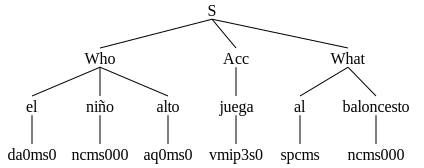

In [9]:
my_parser(tagged_phrases[5])

## Data Extraction

Next, we will analyze each node in the syntactic tree to extract valuable information.

This section aims to provide an understanding of how to navigate through a syntactic tree for the purpose of information extraction. Whether you are looking to identify subjects, objects, or other syntactic elements, understanding the structure of these trees is crucial.

By examining each node, we can pull out various pieces of data that could be beneficial for tasks like text summarization, named entity recognition, or even sentiment analysis.

Ready to dive in? Let's get started.

In [10]:
def extract(_tree):
    
    result = {"Who": '', "Action": None, "Obj": ''} 
    
    for node in _tree:
        
        print('Node:', node)

        if type(node) != tuple: # To avoid nodes without labeling
            
            # Let us detect each label:

            if node.label() == 'Who':
                for element in node:
                    word, tag = element
                    result['Who'] = result['Who'] + ' ' + word
                    
            elif node.label() == 'Acc':
                word, tag = node[0]
                result['Action'] = word
                
            elif node.label() == 'What':
                
                for element in node:
                    word, tag = element
                    result['Obj'] = result['Obj'] + ' ' + word
                    
    result['Obj'] = result['Obj'].strip()
    result['Who'] = result['Who'].strip()
    return result
            

In [11]:
extract(my_parser(tagged_phrases[1]))

Node: (Who hermenegildo/sn.e-SUJ)
Node: (Acc tiene/vmip3s0)
Node: (What un/di0ms0 mechero/ncms000)


{'Who': 'hermenegildo', 'Action': 'tiene', 'Obj': 'un mechero'}

In what follows, let us introduce an alternative, more straightforward approach for extracting information. Please note that this simplified script is best suited for basic taggers. While this approach is easier to implement, it may not capture all the nuances that a more sophisticated method would. So, it's a trade-off between simplicity and depth of analysis.

In [12]:
def my_extraction(_tree):
    
    result = {}
    
    for node in _tree:
        
        if type(node) != tuple:
            
            for element in node:
                word, tag = element
                try:
                    result[node.label()] = result[node.label()] + ' ' + word
                except:
                    result[node.label()] = word
                    
    for key in result.keys():
        result[key] = result[key].strip()
    
    return result

In [13]:
analysis = my_extraction(my_parser(tagged_phrases[3]))
analysis

{'Who': 'maría', 'Acc': 'quiere', 'What': 'una tele curva'}

If sentences are simple, this script provides a highly automated way of extracting information. Learn from it to simplify your code!

## Data Analysis

Now that we have successfully extracted the data, let's move on to the exciting part—data analysis! This is where we can uncover insights, identify patterns, and perhaps even make predictions based on the data we have gathered. Stay tuned as we delve deeper into various techniques and tools that will help you understand and analyze your data effectively.

In [14]:
if analysis['Acc'] == 'tiene':
    output = f"""
        Hola,

        {analysis['Who']}, nos ha dicho que {analysis['Acc']} {analysis['What']}.

        ¿Como le robamos {analysis['What']}?

        Saludos
    """
    
elif analysis['Acc'] == 'quiere':
    output = f"""
        Hola,

        {analysis['Who']}, nos ha dicho que {analysis['Acc']} {analysis['What']}.

        No puedo más con este cliente, ¿Alquien sabe dónde conseguir {analysis['What']}?

        Saludos
    """
    
elif analysis['Acc'] == 'come':
    output = f"""
        Hola,

        {analysis['Who']}, nos ha dicho que prefiere alimentarse a base de {analisis['What']}.

        ¿{analysis['Who']} es vegano?

        Saludos
    """
    
else:
    output = f"""
        Hola,

        {analisis['Who']} es una pesadilla, me lo quiero quitar de encima.
        
        ¿Alguna sugerencia para cargarnoslo mientras le engañamos {analysis['Acc']} {analysis['What']}?

        Saludos
    """

print(output)


        Hola,

        maría, nos ha dicho que quiere una tele curva.

        No puedo más con este cliente, ¿Alquien sabe dónde conseguir una tele curva?

        Saludos
    


## Conclusion

It may appear simple on the surface, but you can imagine the endless applications you can derive from this. For instance, a user could input information into a chatbot, which then provides a tailored output based on that user's specific data. The takeaway here, dear budding data scientists, is that it's all about transforming information to extract value from it. Simple yet powerful process is the cornerstone of what we aim to achieve in data science.!

And the possibilities don't stop there! You could even query a database based on the user's input as a filter to provide even more personalized responses. The sky is the limit when it comes to leveraging data for meaningful interactions and solutions. 🤓

Thank you for following along in these notebooks. As you continue your journey in data science and natural language processing, remember that the key is to always find ways to add value through data. 

<br>

**Happy coding!**

In [15]:
sql = "SELECT * FROM catalogue WHERE product_title like %'" + analysis['What'] + "'%"
print(sql)

SELECT * FROM catalogue WHERE product_title like %'una tele curva'%


In [16]:
sql = "SELECT * FROM clients WHERE name like %'" + analysis['Who'] + "'%"
print(sql)

SELECT * FROM clients WHERE name like %'maría'%
